In [42]:
import pandas as pd
import itertools
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fusion = pd.read_csv('/Users/ky.kee/Desktop/hack_clean1.csv')

In [3]:
fusion.head()

,Greenwald_fraction,Mirnov,Te_width,Wmhd,beta_n,beta_p,dipprog_dt,intentional_disruption,ip,ip_error,...,time,time_until_disrupt,upper_gap,v_loop,v_z,z_error,z_times_v_z,zcur,ip_sign,ip_error_frac
0,0.151900,0.708062,0.146643,13486.817383,0.135813,0.077807,-314468.125,1.0,768961.7500,11855.8750,...,0.38,1.0,0.113652,0.272831,0.266252,0.000607,0.174202,-0.006287,-1.0,0.984582
1,0.171852,0.805292,0.146643,19246.796875,0.188913,0.107879,-314468.125,1.0,779909.5000,7197.4375,...,0.40,1.0,0.111586,2.117520,0.266252,0.000607,0.174202,-0.006287,-1.0,0.990771
2,0.097144,1.174083,0.146643,4910.808105,0.051340,0.031280,-1098889.125,1.0,741398.0625,6404.1250,...,0.28,1.0,0.113232,1.947443,0.266252,0.000607,0.174202,-0.006287,-1.0,0.991362
3,0.155501,5.244929,0.146643,-11733.971680,-0.183073,-0.116469,-1098908.125,1.0,567906.0000,4072.0000,...,0.12,1.0,0.147233,4.524800,0.266252,0.000607,0.174202,-0.006287,-1.0,0.992830
4,0.107892,1.075381,0.146643,7629.673828,0.081691,0.051269,-1098904.000,1.0,722454.0000,3370.1875,...,0.26,1.0,0.117733,1.906433,0.266252,0.000607,0.174202,-0.006287,-1.0,0.995335


In [23]:
fusioNext = fusion.drop(columns=['kappa','lower_gap','n_e','n_equal_1_mode','n_over_ncrit','p_icrf','p_lh','p_oh','p_rad','q0','qstar','v_z','zcur','ip_sign','z_error','upper_gap','z_times_v_z','ip','ip_error','beta_n','dipprog_dt'])

In [24]:
fusioNext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700325 entries, 0 to 700324
Data columns (total 16 columns):
Greenwald_fraction        700325 non-null float64
Mirnov                    700325 non-null float64
Te_width                  700325 non-null float64
Wmhd                      700325 non-null float64
beta_p                    700325 non-null float64
intentional_disruption    700325 non-null float64
li                        700325 non-null float64
n_equal_1_normalized      700325 non-null float64
q95                       700325 non-null float64
radiated_fraction         700325 non-null float64
shot                      700325 non-null float64
ssep                      700325 non-null float64
time                      700325 non-null float64
time_until_disrupt        700325 non-null float64
v_loop                    700325 non-null float64
ip_error_frac             700325 non-null float64
dtypes: float64(16)
memory usage: 85.5 MB


In [25]:
fusioNext.describe()

,Greenwald_fraction,Mirnov,Te_width,Wmhd,beta_p,intentional_disruption,li,n_equal_1_normalized,q95,radiated_fraction,shot,ssep,time,time_until_disrupt,v_loop,ip_error_frac
count,7.003250e+05,700325.000000,700325.000000,7.003250e+05,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000,7.003250e+05,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000
mean,5.332006e+15,3.019252,0.146643,3.475279e+04,0.287838,0.674344,1.483087,0.000972,4.829166,0.423819,1.142433e+09,0.063481,0.955378,0.878591,1.317212,1.005108
std,1.005657e+18,7.919131,0.046322,1.466223e+06,68.626050,0.468620,0.700735,0.000586,1.531189,30.978414,1.548750e+07,0.195976,0.539758,0.337613,1.942216,0.133007
min,0.000000e+00,0.000000,0.024193,-2.502276e+08,-5672.447266,0.000000,0.000000,0.000001,-15.110497,-16010.788086,1.120104e+09,-0.617917,0.060000,-0.098100,-62.859375,-9.118735
25%,1.763162e-01,1.171615,0.138240,1.222011e+04,0.113882,0.000000,1.295862,0.000577,3.889555,0.168361,1.120912e+09,-0.017094,0.480000,1.000000,0.518124,0.983942
50%,2.317109e-01,3.019252,0.146643,2.585408e+04,0.164285,1.000000,1.408793,0.000907,4.572545,0.316796,1.140826e+09,-0.009360,0.940000,1.000000,1.160583,1.004023
75%,3.104399e-01,3.019252,0.150758,4.236054e+04,0.237190,1.000000,1.571983,0.001276,5.344694,0.549124,1.160406e+09,0.021352,1.420000,1.000000,1.777588,1.023067
max,3.749301e+20,729.332243,16.018305,9.890326e+08,54059.589844,1.000000,245.467300,0.014074,125.975060,10570.871086,1.160930e+09,6.975819,2.400000,2.055900,72.411133,10.451964


In [26]:
fusioNext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700325 entries, 0 to 700324
Data columns (total 16 columns):
Greenwald_fraction        700325 non-null float64
Mirnov                    700325 non-null float64
Te_width                  700325 non-null float64
Wmhd                      700325 non-null float64
beta_p                    700325 non-null float64
intentional_disruption    700325 non-null float64
li                        700325 non-null float64
n_equal_1_normalized      700325 non-null float64
q95                       700325 non-null float64
radiated_fraction         700325 non-null float64
shot                      700325 non-null float64
ssep                      700325 non-null float64
time                      700325 non-null float64
time_until_disrupt        700325 non-null float64
v_loop                    700325 non-null float64
ip_error_frac             700325 non-null float64
dtypes: float64(16)
memory usage: 85.5 MB


In [84]:
X = fusioNext[['ip_error_frac', 'v_loop', 'ssep', 'radiated_fraction','q95','n_equal_1_normalized','li','beta_p','Wmhd','Te_width','Greenwald_fraction','Mirnov']]
y = fusioNext['time_until_disrupt']

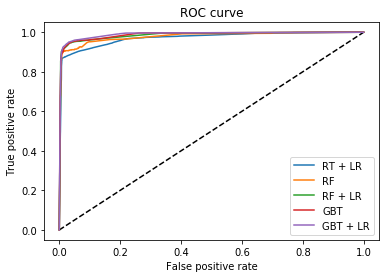

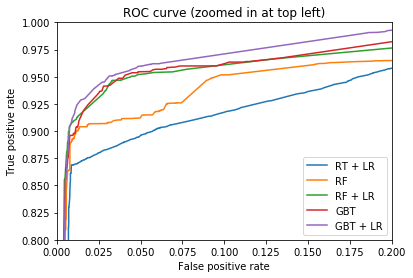

In [85]:
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = 10
X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(
    X_train, y_train, test_size=0.3)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
                          random_state=0)

rt_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [86]:
#model = LogisticRegression().fit(X_train,y_train)
rt_lm = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train,y_train)
print("train score", rt_lm.score(X_train, y_train))
print("test score", rt_lm.score(X_test, y_test))

train score 0.9408928571428572
test score 0.940625


In [87]:
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator).fit(X_train,y_train)
print("train score", rf.score(X_train, y_train))
print("test score", rf.score(X_test, y_test))

train score 0.9403571428571429
test score 0.9416666666666667


In [88]:
grd = GradientBoostingClassifier(n_estimators=n_estimator).fit(X_train,y_train)
print("train score", grd.score(X_train, y_train))
print("test score", grd.score(X_test, y_test))

train score 0.9536989795918367
test score 0.95275


In [51]:
grd

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)